# Task 1 - Setup and Data Preparation
For this task, you will:
- Import necessary packages for executing the code
- Install the EMNIST package
- Load the EMINST (letters) data and study its basic features such as its shape
- Convert the pixel gray levels of the images into the range [0,1]
- One-hot encode the class labels in the data
- Flatten the image data into 1-D arrays

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import methods for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

# Import method to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Install the EMNIST package
# Note: If you haven't already installed the EMNIST package, run the following code to do so
# !pip install emnist

In [2]:
!pip install idx2numpy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7924 sha256=63ead680e6895bea406b2ec98dd15764263f61e50410044b923c36e0599b29ff
  Stored in directory: c:\users\dell 5590\appdata\local\pip\cache\wheels\87\e5\e7\70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


In [3]:
import idx2numpy

In [4]:
letters_test = idx2numpy.convert_from_file("emnist-letters-test-images-idx3-ubyte")

In [5]:
letters_train = idx2numpy.convert_from_file("emnist-letters-train-images-idx3-ubyte")

In [8]:
letters_test_labels = idx2numpy.convert_from_file("emnist-letters-test-labels-idx1-ubyte")

In [9]:
letters_train_labels = idx2numpy.convert_from_file("emnist-letters-train-labels-idx1-ubyte")

In [46]:
X_train, y_train = letters_train, letters_train_labels

In [47]:
X_test, y_test = letters_test, letters_test_labels

In [48]:
print('Train data shape: ', X_train.shape) # (124800, 28, 28) --- 124800 images, each 28x28 pixels
print('Test data shape: ', X_test.shape) # (20800, 28, 28) --- 20800 images, each 28x28

Train data shape:  (124800, 28, 28)
Test data shape:  (20800, 28, 28)


In [49]:
# Look at the frequency of the unique class labels in the training data
unique, counts = np.unique(y_train, return_counts = True)
print('Train labels: ', dict(zip(unique, counts)))

# Look at the frequency of the unique class labels in the testing data
unique, counts = np.unique(y_test, return_counts = True)
print('Test labels: ', dict(zip(unique, counts)))

print('\n')
print('Note that the labels 1, 2, 3, ..., 26 represent the 26 letters of the English alphabet.')

Train labels:  {1: 4800, 2: 4800, 3: 4800, 4: 4800, 5: 4800, 6: 4800, 7: 4800, 8: 4800, 9: 4800, 10: 4800, 11: 4800, 12: 4800, 13: 4800, 14: 4800, 15: 4800, 16: 4800, 17: 4800, 18: 4800, 19: 4800, 20: 4800, 21: 4800, 22: 4800, 23: 4800, 24: 4800, 25: 4800, 26: 4800}
Test labels:  {1: 800, 2: 800, 3: 800, 4: 800, 5: 800, 6: 800, 7: 800, 8: 800, 9: 800, 10: 800, 11: 800, 12: 800, 13: 800, 14: 800, 15: 800, 16: 800, 17: 800, 18: 800, 19: 800, 20: 800, 21: 800, 22: 800, 23: 800, 24: 800, 25: 800, 26: 800}


Note that the labels 1, 2, 3, ..., 26 represent the 26 letters of the English alphabet.


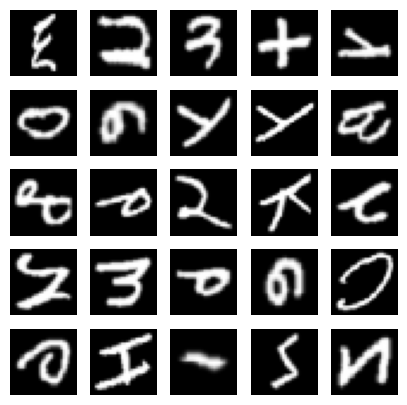

In [50]:
# Sample 25 EMNIST images from the training data and view the images
indices = np.random.randint(0, X_train.shape[0], size = 25)

images = X_train[indices]
labels = y_train[indices]

plt.figure(figsize = (5, 5))

for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')

plt.show()
plt.close('all')

In [51]:
# Convert the pixel gray level values from the range [0, 255] to the range [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

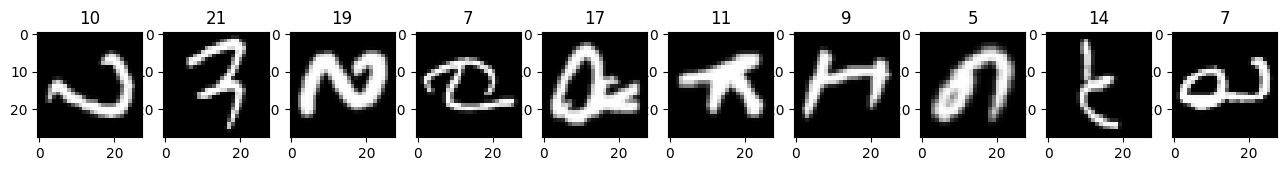

In [52]:
# View a few training data images and their corresponding labels
indices = np.random.randint(0, X_train.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount = indexcount + 1
    plt.subplot(1, 10, indexcount)
    plt.imshow(X_train[data_index], cmap = 'gray')
    plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

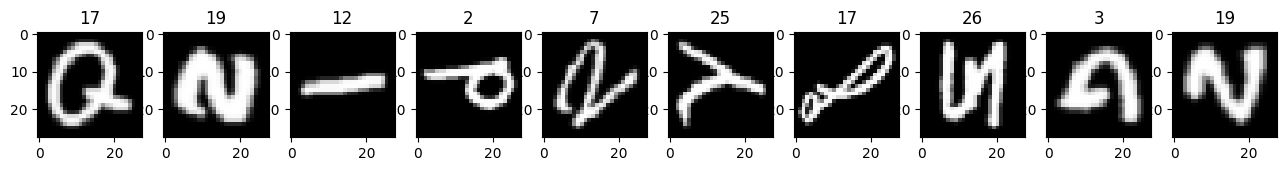

In [53]:
# View a few testing data images and their corresponding labels
indices = np.random.randint(0, X_test.shape[0], size = 10)
plt.figure(figsize = (16, 8))

indexcount = 0
for data_index in indices:
    indexcount = indexcount + 1
    plt.subplot(1, 10, indexcount)
    plt.imshow(X_test[data_index], cmap = 'gray')
    plt.title(str(y_test[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [54]:
# Convert the class labels to one-hot encoded vectors using the 'to_categorical()' function
num_classes = 26

# Note: Reduce all y labels by 1 to ensure that labeling starts at 0 and ends at 25
y_train = to_categorical(y_train - 1, num_classes)
y_test = to_categorical(y_test - 1, num_classes)

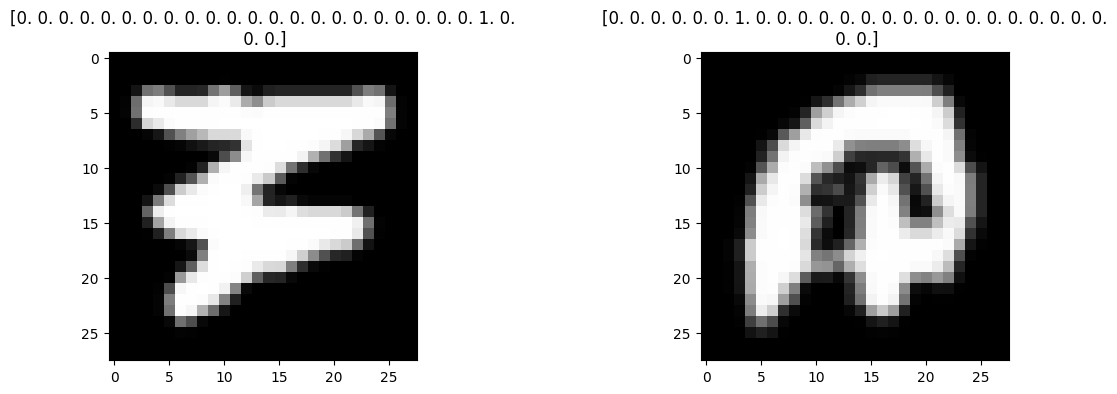

In [55]:
# View a couple of training data images and their corresponding labels
plt.figure(figsize = (14, 4))

for data_index in np.arange(0, 2, 1):
    plt.subplot(1, 2, data_index + 1)
    plt.imshow(X_train[data_index], cmap = 'gray')
    plt.title(str(y_train[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

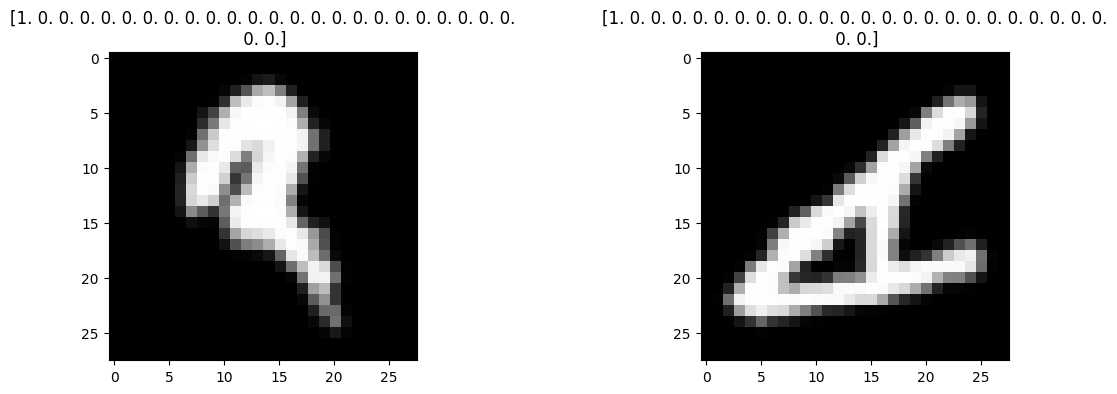

In [56]:
# View a couple of testing data images and their corresponding labels
plt.figure(figsize = (14, 4))

for data_index in np.arange(0, 2, 1):
    plt.subplot(1, 2, data_index + 1)
    plt.imshow(X_test[data_index], cmap = 'gray')
    plt.title(str(y_test[data_index]))

plt.show()
plt.tight_layout()
plt.close('all')

In [57]:
# Flatten the images by converting them into a list of values
image_vector_size = 28 * 28

X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

# Task 2 - FCFNN
For this task, you will perform the following steps:
- Create a function to build a neural network with fixed and variable values for different hyperparameters
  - Fixed hyperparameters
    - Number of hidden layers = 1
    - Number of neurons in the hidden layer = 128
    - Activation function for all output layer neurons = *softmax*
    - Loss function = *categorical_crossentropy*
  - Variable hyperparameters
    - Activation function for all neurons except the output layer ones (default = *sigmoid*)
    - Learning rate (default = 0.001 with *RMSprop* optimizer)
- The *batch_size* hyperparameter will be treated as variable and will be tuned during the training phase (*Keras* default = *None* which is 32)
- Build a default neural network using the custom function and train it on the training data
- Check its performance on the testing data

In [58]:
# Define a function to create a neural network model and specify default values for variable hyperparameters
# Note: The number of hidden layers is fixed at 1
# Note: The number of neurons in the hidden layer is fixed at 128
# Note: The output layer activation function is fixed as 'softmax'
# Note: The loss function is fixed as 'categorical_crossentropy'
def create_nn(activation_function = 'sigmoid',
              learning_rate_value = 0.001):
    
    # Declare an instance of an artificial neural network model using the 'Sequential()' method
    nn = Sequential()
    
    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 128 - This specifies the number of neurons in the hidden layer
    # Note: Set the 'input_shape' parameter to (image_vector_size, ) - This specifies the number of input features for each record
    # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
    nn.add(Dense(units = 128,
                 input_shape = (image_vector_size, ),
                 activation = activation_function))
    
    # Add the output layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 'num_classes' - Multiclass classification with 26 classes requires 26 output neurons
    # Note: Set the 'activation' parameter to 'softmax' - The softmax activation function is commonly used for output layer neurons in multiclass classification tasks
    nn.add(Dense(units = num_classes,
                 activation = 'softmax'))
    
    # Compile the model using the 'compile()' method
    # Note: Set the 'loss' parameter to 'categorical_crossentropy' - The categorical crossentropy loss function is commonly used for multiclass classification tasks
    # Note: Set the 'metrics' parameter to 'accuracy' - This records the accuracy of the model along with the loss during training
    # Note: Set the 'optimizer' parameter to 'RMSprop' and set its 'learning_rate' parameter to 'learning_rate_value' - This specifies the learning rate value defined in the custom function
    nn.compile(loss = 'categorical_crossentropy',
               metrics = ['accuracy'],
               optimizer = RMSprop(learning_rate = learning_rate_value))
    
    return(nn)

In [59]:
# Create a default neural network using the 'create_nn' function and train it on the training data
nn1 = create_nn()

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_split' parameter to 0.2 - This sets aside 20% of the training data as validation data
# Note: Set the 'epochs' parameter to 200 - This specifies the scope of loss computations and parameter updates
# Note: Set the 'batch_size' to 'X_train.shape[0]' - This specifies the batch size as the complete training data set instead of the default value of 32
nn1.summary()
print('\n')
nn1_history = nn1.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 103,834
Trainable params: 103,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 3.4458 - accuracy: 0.0384 - val_loss: 3.2537 - val_accuracy: 0.0853
Epoch 2/200
1/1 [==============================] - 1s 938ms/step - loss: 3.2549 - accuracy: 0.0870 - val_loss: 3.1682 - val_accuracy: 0.1070
Epoch 3/200
1/1 [==============================] - 1s 956ms/step - loss: 3.1689 - accuracy: 0.1074 - val_loss: 3.1048 - val_accuracy: 0.1545
Epoch 4/200
1/1 [=======

In [60]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,3.445828,0.038361,3.253734,0.085337
2,3.254910,0.087029,3.168181,0.106971
3,3.168888,0.107402,3.104839,0.154527
4,3.105173,0.157963,3.051656,0.213582
5,3.051615,0.216777,3.004200,0.264503
...,...,...,...,...
196,1.041194,0.706050,1.050033,0.704167
197,1.039054,0.707492,1.047818,0.703886
198,1.036925,0.707071,1.045860,0.705729


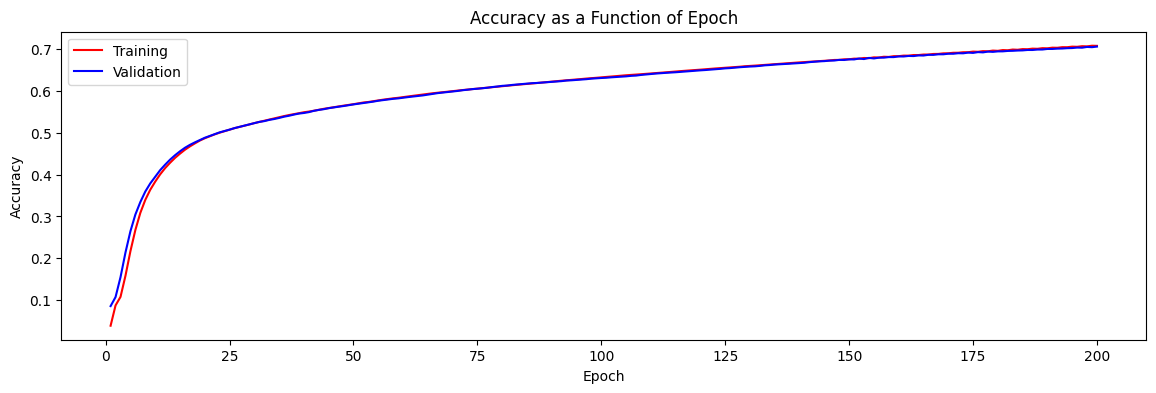

In [61]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [62]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

650/650 [==============================] - 1s 2ms/step - loss: 1.0411 - accuracy: 0.7087
The loss value of the model on the test data is 1.0410668849945068
The accuracy of the model on the test data is 0.7087019085884094


# Task 3 - FCFNN Hyperparameter Tuning: Batch Size
For this task, you will perform the following steps:
- Build a default neural network using the custom function and train it on the training data for different batch sizes
  - Note that less epochs are required to train the model if the training data is divided into batches
- View the impact of batch size on the accuracy of the model

In [63]:
# Declare a range of batch sizes to tune for
batch_size_list = [32, 128, 512, 2048]

# Create and train a neural network model for each value of batch size
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_batch_size in batch_size_list:
    indexcount = indexcount + 1
    
    # Create a default neural network model using the 'create_nn' function
    nn = create_nn()
    
    # Capture the training history of the model using the 'fit()' method
    # Note: Set the 'validation_split' parameter to 0.2
    # Note: Set the 'epochs' parameter to 10 - A smaller number of epochs is required to train the model if the training data is divided into batches
    # Note: Set the 'batch_size' to 'current_batch_size' - This specifies the current batch size
    print('\n Training and validation for batch size = {} - START \n'.format(current_batch_size))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = current_batch_size, validation_split = 0.2, epochs = 10)
    print('\n Training and validation for batch size = {} - END \n'.format(current_batch_size))
    
    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Batch Size': current_batch_size,
                                  'Train Accuracy': hist[indexcount]['accuracy'][9],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})
    
    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for batch size = 32 - START 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 26)                3354      
                                                                 
Total params: 103,834
Trainable params: 103,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
3120/3120 [==============================] - 11s 3ms/step - loss: 1.1017 - accuracy: 0.6956 - val_loss: 0.7797 - val_accuracy: 0.7768
Epoch 2/10
3120/3120 [==============================] - 10s 3ms/step - loss: 0.6587 - accuracy: 0.8088 - val_loss: 0.5907 - val_accuracy: 0.8274
Epoch 3/10
3120/3120 [==============================] - 11s 4ms/step - loss: 0.5220 - accuracy: 

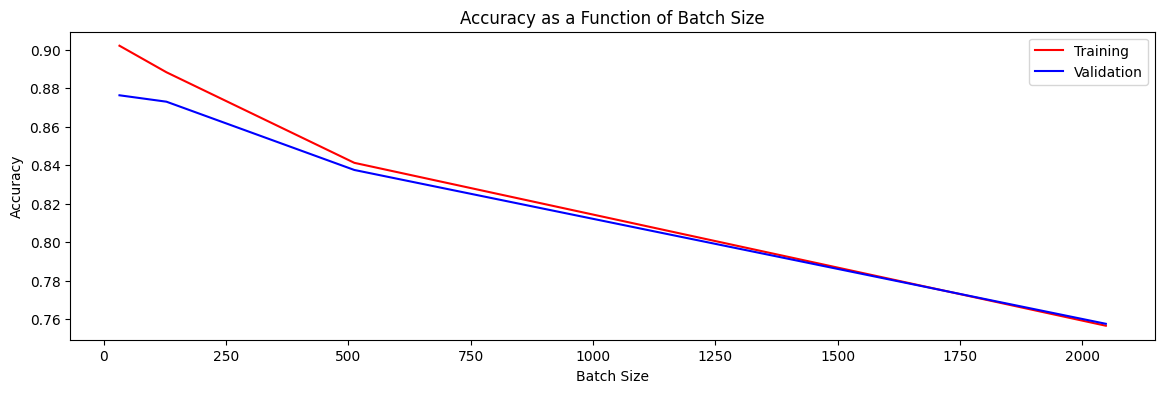

In [64]:
# View the training and validation accuracies as functions of batch size
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Batch Size', y = 'Train Accuracy', color = 'red', label = 'Training')
sns.lineplot(data = performance_df, x = 'Batch Size', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Batch Size');

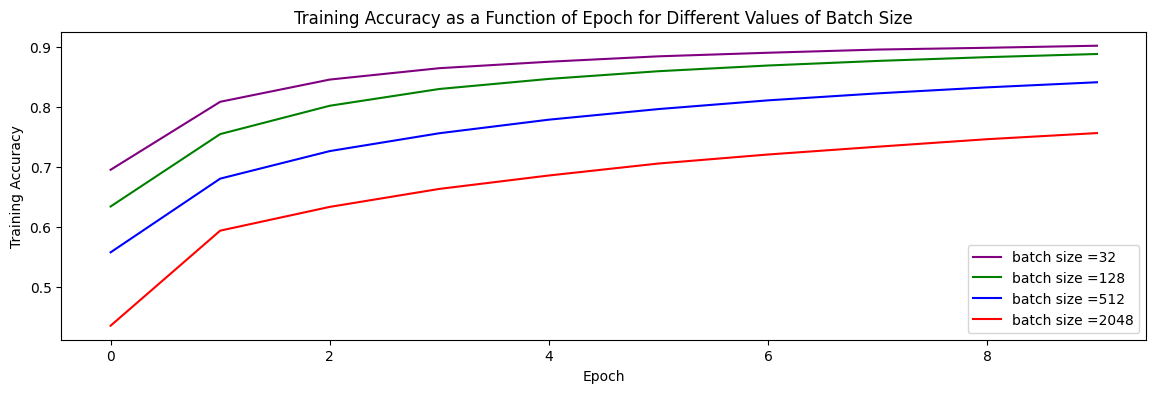

In [65]:
# View the training accuracies as functions of epochs for different values of batch size
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_batch_size in batch_size_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = 'batch size =' + str(current_batch_size))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Batch Size');

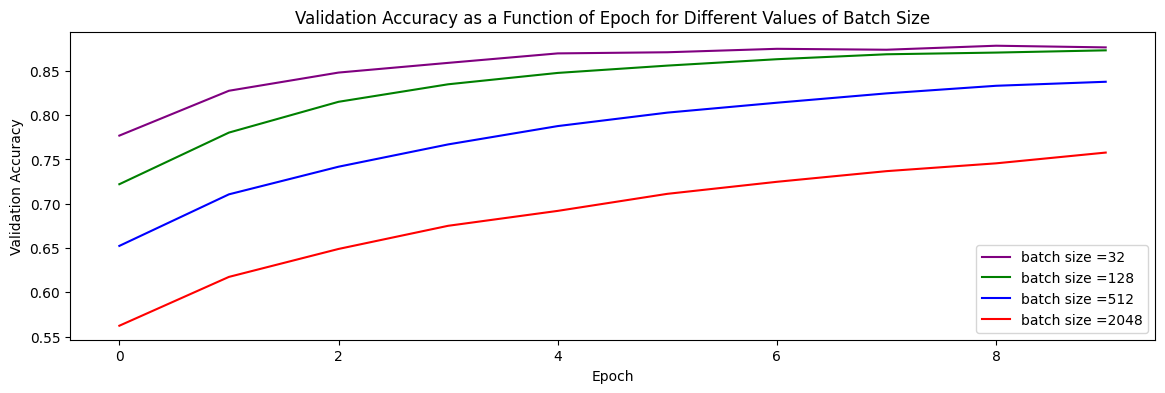

In [66]:
# View the validation accuracies as functions of epochs for different values of batch size
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_batch_size in batch_size_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = 'batch size =' + str(current_batch_size))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Batch Size');

# Task 4 - FCFNN Hyperparameter Tuning: Activation Function
For this task, you will perform the following steps:
- Build a neural network using the custom function and train it on the training data using different activation functions
  - For this task, the training data will not be divided into batches, and consequently a higher number of epochs will be required to train the model
- View the impact of the type of activation function on the accuracy of the model

In [67]:
# Declare a list of activation functions to tune for
activation_function_list = ['sigmoid', 'relu']

# Create and train a neural network model for each type of activation function
performance_df = pd.DataFrame(data = None)
hist = [None] * 2
indexcount = -1

for current_activation_function in activation_function_list:
    indexcount = indexcount + 1
    
    # Create a neural network model using the 'create_nn' function
    # Note: Set the 'activation_function' parameter to 'current_activation_function' - This specifies the current activation function
    nn = create_nn(activation_function = current_activation_function)
    
    # Capture the training history of the model using the 'fit()' method
    # Note: Set the 'validation_split' parameter to 0.2
    # Note: Set the 'epochs' parameter to 200
    # Note: Set the 'batch_size' to 'X_train.shape[0]'
    print('\n Training and validation for {} activation function - START \n'.format(current_activation_function))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for {} activation function - END \n'.format(current_activation_function))
    
    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Activation Function': current_activation_function,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})
    
    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for sigmoid activation function - START 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 26)                3354      
                                                                 
Total params: 103,834
Trainable params: 103,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 3.4563 - accuracy: 0.0351 - val_loss: 3.2695 - val_accuracy: 0.0829
Epoch 2/200
1/1 [==============================] - 1s 813ms/step - loss: 3.2682 - accuracy: 0.0841 - val_loss: 3.1755 - val_accuracy: 0.1359
Epoch 3/200
1/1 [==============================] - 1s 654ms/step - loss: 3.1737 - accuracy: 0.1

In [ ]:
# View the training and validation accuracies as functions of activation function type
performance_df.set_index('Activation Function')

# Task 5 - FCFNN Hyperparameter Tuning: Learning Rate
For this task, you will perform the following steps:
- Build a neural network using the custom function and train it on the training data for different learning rates
  - For this task, the training data will not be divided into batches, and consequently a higher number of epochs will be required to train the model
- View the impact of learning rate on the accuracy of the model

In [68]:
# Declare a range of learning rates to tune for
learning_rate_list = [0.001, 0.01, 0.1, 1]

# Create and train a neural network model for each value of learning rate
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_learning_rate in learning_rate_list:
    indexcount = indexcount + 1
    
    # Create a neural network model using the 'create_nn' function
    # Note: Set the 'learning_rate_value' parameter to 'current_learning_rate' - This specifies the current learning rate
    nn = create_nn(learning_rate_value = current_learning_rate)
    
    # Capture the training history of the model using the 'fit()' method
    # Note: Set the 'validation_split' parameter to 0.2
    # Note: Set the 'epochs' parameter to 200
    # Note: Set the 'batch_size' to 'X_train.shape[0]'
    print('\n Training and validation for learning rate = {} - START \n'.format(current_learning_rate))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = X_train.shape[0], validation_split = 0.2, epochs = 200)
    print('\n Training and validation for learning rate = {} - END \n'.format(current_learning_rate))
    
    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Learning Rate': current_learning_rate,
                                  'Train Accuracy': hist[indexcount]['accuracy'][199],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][199]})
    
    performance_df = pd.concat([performance_df, tempdf])


 Training and validation for learning rate = 0.001 - START 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 26)                3354      
                                                                 
Total params: 103,834
Trainable params: 103,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 3.3743 - accuracy: 0.0536 - val_loss: 3.2134 - val_accuracy: 0.0867
Epoch 2/200
1/1 [==============================] - 1s 507ms/step - loss: 3.2129 - accuracy: 0.0893 - val_loss: 3.1339 - val_accuracy: 0.1705
Epoch 3/200
1/1 [==============================] - 1s 665ms/step - loss: 3.1331 - accuracy: 0.1750 - 

In [ ]:
# View the training and validation accuracies as functions of learning rate
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Learning Rate', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Learning Rate', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Learning Rate');

In [ ]:
# View the training accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_learning_rate in learning_rate_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'accuracy',
                 color = colorlist[indexcount],
                 label = 'learning rate = ' + str(current_learning_rate))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Learning Rate');

In [ ]:
# View the validation accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_learning_rate in learning_rate_list:
    indexcount = indexcount + 1
    sns.lineplot(data = hist[indexcount],
                 x = 'epoch',
                 y = 'val_accuracy',
                 color = colorlist[indexcount],
                 label = 'learning rate = ' + str(current_learning_rate))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Learning Rate');

# Task 6 - FCFNN Hyperparameter Tuning: Combinations of Hyperparameters
For this task, you will perform the following steps:
- Build a neural network (tuned for batch size and learning rate) using *keras* and train it on the training data
  - Note that less epochs are required to train the model if the training data is divided into batches
- Test its performance on the testing data

In [ ]:
# Initialize a basic neural network object using the 'KerasClassifier()' method
# Note: Set the 'build_fn' parameter to 'create_nn' - This converts the 'create_nn' function into a 'KerasClassifier' object
base_grid_model = KerasClassifier(build_fn = create_nn)

# Define a list of 'activation_function', 'batch_size' and 'learning_rate_value' parameters and store it in a parameter grid dictionary
# Note: 'KerasClassifier()' recognizes the 'batch_size' parameter even though it is not defined explicitly in 'create_nn()'
parameters_grid = {'activation_function': ['sigmoid', 'relu'],
                   'batch_size': [32, 512],
                   'learning_rate_value': [0.01, 0.1]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Note: Set the 'estimator' parameter to 'base_grid_model' - This specifies the estimator to be used by 'GridSearchCV()'
# Note: Set the 'param_grid' parameter to 'parameters_grid' - This specifies the grid of parameters to search over
# Note: Set the 'cv' parameter to 2 - This specifies the number of folds in the cross-validation process
# Note: Set the 'verbose' parameter to 4 - This helps show more relevant information during training
grid = GridSearchCV(estimator = base_grid_model,
                    param_grid = parameters_grid,
                    cv = 2,
                    verbose = 4)

# Train the model on the training data using the 'fit()' method
# Note: Set the 'epochs' parameter to 10
# Note: The 'validation_split' parameter isn't particularly required since cross-validation is already in place
grid_model = grid.fit(X_train, y_train, epochs = 10)

# Print the optimal values of 'activation_function', 'batch_size' and 'learning_rate_value'
best_activation_function = grid_model.best_params_['activation_function']
best_batch_size = grid_model.best_params_['batch_size']
best_learning_rate = grid_model.best_params_['learning_rate_value']
best_accuracy = grid_model.best_score_

print('The optimal type of activation function is', best_activation_function)
print('The optimal value of batch size is', best_batch_size)
print('The optimal value of learning rate is ', best_learning_rate)
print('The accuracy of the model with these optimal parameters is ', best_accuracy)

In [ ]:
# Retrain the model with the optimal combination of hyperparameters and save its training history

# Use the 'create_nn' function to create a neural network with the optimal values of 'activation_function', 'batch_size' and 'learning_rate_value'
# Note: Set the 'activation_function' parameter to 'best_activation_function' - This specifies the optimal value for the 'activation_function' parameter
# Note: Set the 'learning_rate_value' parameter to 'best_learning_rate' - This specifies the optimal value for the 'learning_rate_value' parameter
nn2 = create_nn(activation_function = best_activation_function, learning_rate_value = best_learning_rate)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_split' parameter to 0.2
# Note: Set the 'epochs' parameter to 10
# Note: Set the 'batch_size' to 'best_batch_size' - This specifies the optimal value for the 'batch_size' parameter
nn2.summary()
print('\n')
nn2_history = nn2.fit(X_train, y_train, batch_size = best_batch_size, validation_split = 0.2, epochs = 10)
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn2.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

# Task 7 - Early Stopping
For this task, you will perform the following steps:
- Build a neural network (with the same settings as *nn2*) using the custom function and train it on the training data with early stopping criteria
- Test its performance on the testing data

In [ ]:
# Use basic early stopping with patience to prevent overfitting in 'nn2'

# Create a neural network using the 'create_nn' function with optimal hyperparameter settings
# Note: Set the 'activation_function' parameter to 'best_activation_function'
# Note: Set the 'learning_rate_value' parameter to 'best_learning_rate'
nn3 = create_nn(activation_function = best_activation_function,
                learning_rate_value = best_learning_rate)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'batch_size' parameter to 'best_batch_size'
# Note: Set the 'validation_split' parameter to 0.2
# Note: Set the 'epochs' parameter to 20
# Note: Set the 'callbacks' parameter to [EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1)]
nn3.summary()
print('\n')
nn3_history = nn3.fit(X_train,
                      y_train,
                      batch_size = best_batch_size,
                      validation_split = 0.2,
                      epochs = 20,
                      callbacks = [EarlyStopping(monitor = 'val_loss',
                                                 mode = 'min',
                                                 verbose = 1)])

In [ ]:
# Use advanced early stopping with patience to prevent overfitting in 'nn2'

# Create a neural network using the 'create_nn' function with optimal hyperparameter settings
# Note: Set the 'activation_function' parameter to 'best_activation_function'
# Note: Set the 'learning_rate_value' parameter to 'best_learning_rate'
nn3 = create_nn(activation_function = best_activation_function,
                learning_rate_value = best_learning_rate)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'batch_size' parameter to 'best_batch_size'
# Note: Set the 'validation_split' parameter to 0.2
# Note: Set the 'epochs' parameter to 20
# Note: Set the 'callbacks' parameter to [EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 2, verbose = 1)]
nn3.summary()
print('\n')
nn3_history = nn3.fit(X_train,
                      y_train,
                      batch_size = best_batch_size,
                      validation_split = 0.2,
                      epochs = 20,
                      callbacks = [EarlyStopping(monitor = 'val_loss',
                                                 mode = 'min',
                                                 patience = 2,
                                                 verbose = 1)])

In [ ]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn3_history.history)
hist['epoch'] = nn3_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

In [ ]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [ ]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn3.evaluate(X_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

# Task 8 - Dropouts
For this task, you will perform the following steps:
- Redefine the custom function to build a neural network with an additional dropout layer and variable dropout rates
- Create a neural network (with the same settings as *nn2* and an additional dropout layer) using the new custom function and train it on the training data
- View the impact of dropout rate on the accuracy of the model

In [ ]:
# Define a function to create a neural network model and specify a default value for dropout rate
# Note: The number of hidden layers is fixed at 1
# Note: The number of neurons in the hidden layer is fixed at 128
# Note: The activation function is fixed as 'best_activation_function'
# Note: The output layer activation function is fixed as 'softmax'
# Note: The loss function is fixed as 'categorical_crossentropy'
# Note: The learning rate is fixed as 'best_learning_rate'
# Note: The number of dropout layers is fixed at 1
def create_dropout_nn(dropout_rate = 0.5):
    
    # Declare an instance of an artificial neural network model using the 'Sequential()' method
    nn = Sequential()
    
    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 128
    # Note: Set the 'input_shape' parameter to (image_vector_size, )
    # Note: Set the 'activation' parameter to 'best_activation_function'
    nn.add(Dense(units = 128,
                 input_shape = (image_vector_size, ),
                 activation = best_activation_function))
    
    # Add a dropout layer using the 'add()' and 'Dropout()' methods
    # Note: Set the 'rate' parameter to 'dropout_rate' - This specifies the dropout rate parameter defined in the custom function
    nn.add(Dropout(rate = dropout_rate))
    
    # Add the output layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 'num_classes'
    # Note: Set the 'activation' parameter to 'softmax'
    nn.add(Dense(units = num_classes,
                 activation = 'softmax'))
    
    # Compile the model using the 'compile()' method
    # Note: Set the 'loss' parameter to 'categorical_crossentropy'
    # Note: Set the 'metrics' parameter to 'accuracy'
    # Note: Set the 'optimizer' parameter to 'RMSprop' and set its 'learning_rate' parameter to 'best_learning_rate'
    nn.compile(loss = 'categorical_crossentropy',
               metrics = ['accuracy'],
               optimizer = RMSprop(learning_rate = best_learning_rate))
    
    return(nn)

In [ ]:
# Declare a range of dropout rates to tune for
dropout_rate_list = [0.05, 0.1, 0.2, 0.5]

# Create and train a neural network model for each value of dropout rate
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_dropout_rate in dropout_rate_list:
    indexcount = indexcount + 1
    
    # Create a neural network model using the 'create_dropout_nn' function
    # Note: Set the 'dropout_rate' parameter to 'current_dropout_rate' - This specifies the current dropout rate
    nn = create_dropout_nn(dropout_rate = current_dropout_rate)
    
    # Capture the training history of the model using the 'fit()' method
    # Note: Set the 'validation_split' parameter to 0.2
    # Note: Set the 'epochs' parameter to 10
    # Note: Set the 'batch_size' to 'best_batch_size'
    print('\n Training and validation for dropout rate = {} - START \n'.format(current_dropout_rate))
    nn.summary()
    print('\n')
    nn_history = nn.fit(X_train, y_train, batch_size = best_batch_size, validation_split = 0.2, epochs = 10)
    print('\n Training and validation for dropout rate = {} - END \n'.format(current_dropout_rate))
    
    hist[indexcount] = pd.DataFrame(nn_history.history)
    hist[indexcount]['epoch'] = nn_history.epoch
    
    tempdf = pd.DataFrame(index = [indexcount],
                          data = {'Dropout Rate': current_dropout_rate,
                                  'Train Accuracy': hist[indexcount]['accuracy'][9],
                                  'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})
    
    performance_df = pd.concat([performance_df, tempdf])

In [ ]:
# View the training and validation accuracies as functions of dropout rate
plt.figure(figsize = (14, 4))

sns.lineplot(data = performance_df, x = 'Dropout Rate', y = 'Train Accuracy', color = 'red', label = 'Train')
sns.lineplot(data = performance_df, x = 'Dropout Rate', y = 'Validation Accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Dropout Rate');